<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from google.colab import files
# files.upload()

!pip install -q kaggle
!mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/secrets/kaggle.json' ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d shivam2503/diamonds
!kaggle datasets download -d datascientistanna/customers-dataset
!mkdir dataset
!unzip -o -q /content/diamonds.zip -d /content/dataset
!unzip -o -q /content/customers-dataset.zip -d /content/dataset

diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
customers-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Load data

In [ ]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
california_housing = datasets.fetch_california_housing(as_frame=True)
diamonds_df = pd.read_csv("/content/dataset/diamonds.csv", sep=",", header=0)
customers_df = pd.read_csv("/content/dataset/Customers.csv", sep=",", header=0)

In [ ]:
diamonds_df.drop(['Unnamed: 0'], axis=1, inplace=True)

Iris

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# sns.heatmap(iris.frame.corr(), annot=True, cmap='rainbow')

In [ ]:
# sns.pairplot(iris.frame, hue='target', height=2.5)

Wine

In [ ]:
wine.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [ ]:
wine.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

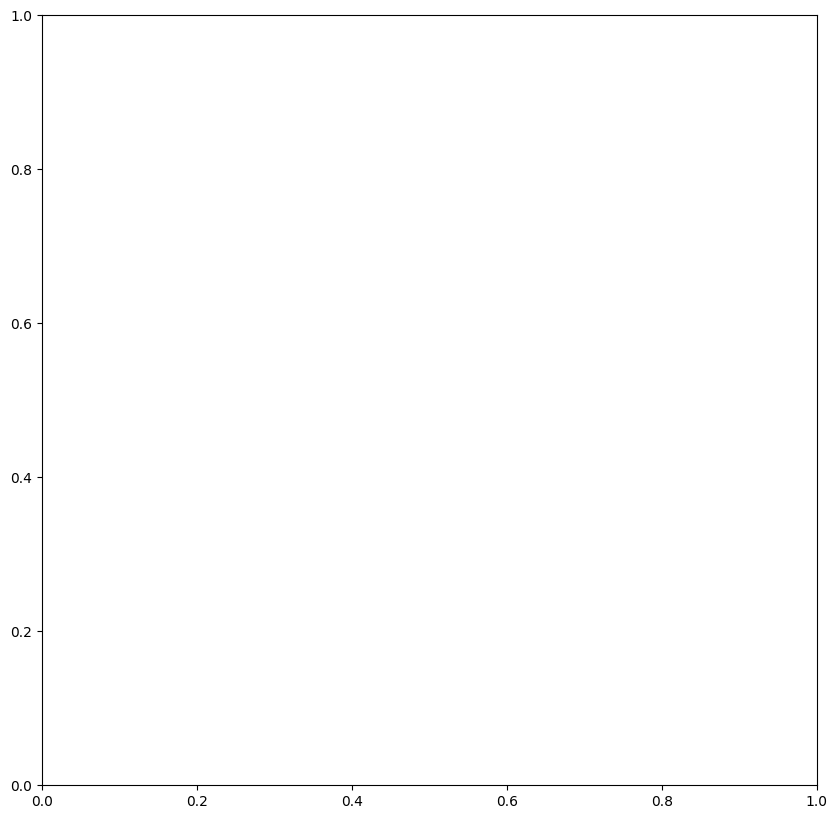

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
# sns.heatmap(wine.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
# sns.pairplot(wine.frame, hue='target', height=2.5)

California

In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# fig, axes = plt.subplots(figsize=(10,10))
# sns.heatmap(california_housing.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
temp_scaler = StandardScaler(copy=True)

standardized_housing = pd.DataFrame(temp_scaler.fit_transform(california_housing.frame), columns=california_housing.frame.columns)
# sns.jointplot(data=standardized_housing, x='MedHouseVal', y='MedInc', kind="kde")

Diamonds

In [ ]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamonds_df.head()
# TODO: how analyze nonnumerical data?

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# fig, axes = plt.subplots(figsize=(10,10))
# sns.heatmap(diamonds_df.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
# standardized_diamonds = pd.DataFrame(temp_scaler.fit_transform(diamonds_df), \
# columns=diamonds_df.columns)
diamonds_df.head()
numerical = ['carat', 'depth', 'table','price', 'x', 'y', 'z']
categorical = ['cut', 'color', 'clarity']

diamonds_color = diamonds_df['color']

In [ ]:
diamonds_df.drop(categorical, inplace=True, axis=1)

Customers


In [ ]:
customers_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
encoder = OrdinalEncoder()

customers_df['Gender'] = encoder.fit_transform(customers_df.Gender.values.reshape(-1, 1))
customers_df['Profession'] = encoder.fit_transform(customers_df.Profession.values.reshape(-1, 1))

In [ ]:
# fig, axes = plt.subplots(figsize=(10,10))
# sns.heatmap(customers_df.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
# sns.pairplot(customers_df, hue='Profession', height=2.5)

In [ ]:
# sns.pairplot(customers_df, hue='Gender', height=2.5)

# Zad 1

In [ ]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('pca_dim_reduction', PCA(n_components=2)),
    ]
)

In [ ]:
iris_target = iris.frame['target']
iris_df = iris.frame.drop(['target'], axis=1)

In [ ]:
iris_pca = pd.DataFrame(data=pca_pipeline.fit_transform(iris_df), columns = ['pca1', 'pca2'])

In [ ]:
# sns.scatterplot(data=iris_pca, x='pca1', y='pca2', hue=iris.frame['target'])

In [ ]:
wine_df = wine.frame.drop(['target'], axis=1)

In [ ]:
wine_pca = pd.DataFrame(data = pca_pipeline.fit_transform(wine_df), columns = ['pca1', 'pca2'])

In [ ]:
# sns.scatterplot(data=wine_pca, x='pca1', y='pca2', hue=wine.frame['target'])

In [ ]:
customers_df = customers_df.dropna().reset_index(drop=True)
customers_temp = customers_df.drop(['Gender', 'Profession'], axis=1)
customers_temp.head()
# print(customers_df.shape)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6


In [ ]:
customers_pca = pd.DataFrame(pca_pipeline.fit_transform(customers_temp), columns = ['pca1', 'pca2'])
# sns.scatterplot(data=customers_pca, x='pca1', y='pca2', hue=customers_df['Gender'])
# TODO: finde better dataset

# Zad 2

In [ ]:
# california_housing.frame.info()
california_pca = pd.DataFrame(pca_pipeline.fit_transform(california_housing.frame), columns = ['pca1', 'pca2'])

In [ ]:
# sns.scatterplot(data=california_pca, x='pca1', y='pca2')

In [ ]:
diamonds_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds_pca = pd.DataFrame(pca_pipeline.fit_transform(diamonds_df), columns = ['pca1', 'pca2'])

In [ ]:
# sns.scatterplot(data=diamonds_pca, x='pca1', y='pca2')

# Zad 3

In [ ]:
standarization_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
    ]
)

lda = LDA(n_components=2)

In [ ]:
iris_stand = pd.DataFrame(data=standarization_pipeline.fit_transform(iris_df))
iris_lda = pd.DataFrame(lda.fit_transform(iris_stand, iris_target), columns=['lda1', 'lda2'])

In [ ]:
sns.scatterplot(data=iris_lda, x='lda2', y='lda1', hue=iris_target)

In [ ]:
wine_df
wine_stand = pd.DataFrame(data=standarization_pipeline.fit_transform(wine_df))

wine_lda = pd.DataFrame(lda.fit_transform(wine_stand, wine.target), columns=['lda1', 'lda2'])

In [ ]:
sns.scatterplot(data=wine_lda, x='lda2', y='lda1', hue=wine.target)

In [ ]:
# customers_lda = pd.DataFrame(pca_pipeline.fit_transform(customers_temp), columns = ['lda1', 'lda2'])
# sns.scatterplot(data=customers_lda, x='lda1', y='lda2')
customers_profession = customers_df['Profession']
# customers_df.drop(['Profession'], inplace=True, axis=1)

# FIXME
customers_stand = pd.DataFrame(data=standarization_pipeline.fit_transform(customers_temp))
customers_lda = pd.DataFrame(lda.fit_transform(customers_stand, customers_profession), columns=['lda1', 'lda2'])
# customers_lda = lda.fit_transform(customers_stand, customers_profession)
customers_lda

,lda1,lda2
0,0.068147,0.070176
1,0.028225,0.277523
2,-0.334892,1.043693
3,-0.804019,0.228254
4,0.219518,0.031681
...,...,...
1960,0.836621,-0.677029
1961,0.710240,-0.585894
1962,0.674785,0.731846
1963,0.176937,0.553519


In [ ]:
# california_lda = pd.DataFrame(pca_pipeline.fit_transform(california_housing.frame), columns = ['lda1', 'lda2'])
# sns.scatterplot(data=wine_lda, x='lda1', y='lda2')


california_stand = pd.DataFrame(data=standarization_pipeline.fit_transform(california_housing.frame))
california_lda = pd.DataFrame(lda.fit_transform(california_stand, california_housing.frame.HouseAge), columns=['lda1'])
temp = standarization_pipeline.fit_transform(california_housing.data)
# temp_lda = lda.fit_transform(temp, california_housing.target)
california_housing.target = california_housing.target.astype('int')
temp_lda = lda.fit_transform(temp, california_housing.target)
temp_lda

array([[ 3.44682665, -1.91206316],
       [ 3.26949672, -0.93499446],
       [ 2.64758316, -1.37765103],
       ...,
       [-3.39620481, -1.57334493],
       [-3.14374702, -1.65075004],
       [-2.7928517 , -1.74676512]])

In [ ]:
diamonds_stand = pd.DataFrame(data=standarization_pipeline.fit_transform(diamonds_df))
diamonds_lda = pd.DataFrame(lda.fit_transform(diamonds_stand, diamonds_color), columns=['lda1', 'lda2'])
# diamonds_lda = pd.DataFrame(pca_pipeline.fit_transform(diamonds_df), columns = ['lda1', 'lda2'])
# sns.scatterplot(data=wine_lda, x='lda1', y='lda2')

In [ ]:
sns.scatterplot(data=diamonds_lda, x='lda2', y='lda1', hue=diamonds_color)

# Zad 4

In [ ]:
# svd_pipeline = Pipeline(
#     [
#       ('scaler', StandardScaler()),
#       ('svd_dim_reduction', TruncatedSVD()),
#     ]
# )

svd = TruncatedSVD(n_components=2)

In [ ]:
# iris_stand
iris_svd = pd.DataFrame(svd.fit_transform(iris_stand), columns=['svd1', 'svd2'])

In [ ]:
sns.scatterplot(data=iris_svd, x='svd2', y='svd1', hue=iris_target)

In [ ]:
california_svd = pd.DataFrame(svd.fit_transform(california_stand), columns=['svd1', 'svd2'])

In [ ]:
sns.scatterplot(data=california_svd, x='svd2', y='svd1')

In [ ]:
wine_svd = pd.DataFrame(svd.fit_transform(wine_stand), columns=['svd1', 'svd2'])

In [ ]:
sns.scatterplot(data=wine_svd, x='svd2', y='svd1', hue=wine.target)

In [ ]:
customers_svd = pd.DataFrame(svd.fit_transform(customers_stand), columns=['svd1', 'svd2'])

In [ ]:
sns.scatterplot(data=customers_svd, x='svd2', y='svd1')

In [ ]:
diamonds_svd = pd.DataFrame(svd.fit_transform(diamonds_stand), columns=['svd1', 'svd2'])

In [ ]:
sns.scatterplot(data=diamonds_svd, x='svd2', y='svd1')